# Create test and train splits.

## Create Corpus

In [1]:
import pandas as pd
from copy import copy
import math, re
from nltk import word_tokenize
import random as rd
import csv
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np






data_complete = "../data/amazon.csv"
data_filtered = "../data/amazon_filtered.csv"

## Describe Dataset

In [2]:
df = pd.read_csv(data_filtered)
print(data_filtered, df.columns)

star1 = np.array([df.star_rating.value_counts()[1], 0])
star2 = np.array([df.star_rating.value_counts()[2], 0])
star3 = np.array([0, df.star_rating.value_counts()[3]])
star4 = np.array([0, df.star_rating.value_counts()[4]])
star5 = np.array([0, df.star_rating.value_counts()[5]])

../data/amazon_filtered.csv Index(['Unnamed: 0', 'customer_id', 'review_id', 'product_id', 'product_title',
       'product_category', 'star_rating', 'review_headline', 'review_body',
       'bool_rating', 'categorie', 'title_tokenized', 'tokens', 'text'],
      dtype='object')


[538   0] [213   0] [  0 329] [  0 604] [   0 2167]


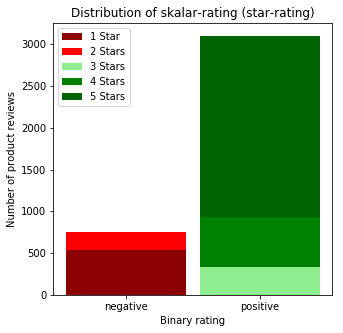

In [3]:
%matplotlib inline
df.star_rating.value_counts()

print(star1, star2, star3, star4, star5)
width=0.9
plt.figure(figsize=(5,5))
p1 = plt.bar([0,1], star1, width, color="darkred")
p2 = plt.bar([0,1], star2, width, bottom=star1, color="red")
p3 = plt.bar([0,1], star3, width, bottom=star1+star2, color="lightgreen")
p4 = plt.bar([0,1], star4, width, bottom=star1+star2+star3, color="green")
p5 = plt.bar([0,1], star5, width, bottom=star1+star2+star3+star4, color="darkgreen")




plt.ylabel('Number of product reviews')
plt.xlabel('Binary rating')

plt.title('Distribution of skalar-rating (star-rating)')

plt.xticks([0,1],('negative', 'positive'))

plt.legend(('1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'))

#plt.show()
plt.savefig("../figs/rating-distribution.png")

In [4]:
df.bool_rating.value_counts()

True     3100
False     751
Name: bool_rating, dtype: int64

## Create Dataset

In [5]:
n_product = [ 50, 50, 201, 169, 100, 100, 100]
n_reviews = [ 110+29, 979+411, 842+173, 1410+251, 578+120,210+7, 719+81]
df = pd.read_csv(data_filtered)
print(len(df))
df = df.drop_duplicates(subset=["review_body"])
print(len(df))
print(df.columns)

3851
3815
Index(['Unnamed: 0', 'customer_id', 'review_id', 'product_id', 'product_title',
       'product_category', 'star_rating', 'review_headline', 'review_body',
       'bool_rating', 'categorie', 'title_tokenized', 'tokens', 'text'],
      dtype='object')


In [6]:
import operator
df = pd.read_csv(data_filtered)
print(len(df))
df = df.drop_duplicates(subset=["review_body"])
print(len(df))


df["test_idx"] = -1
categorie_keys = df['product_category'].value_counts(dropna=False).keys().tolist()
categorie_counts = df['product_category'].value_counts(dropna=False).tolist()
categorie_count_dict = dict(zip(categorie_keys, categorie_counts))
four_largest_categories = list(sorted(categorie_count_dict.items(), key=operator.itemgetter(1), reverse=True))[:4]

dfs = []
for rit in range(0, 10):
    sets = []

    for category , _ in four_largest_categories:
        df_category = df[df.product_category == category]
        rid_pos = df_category[df_category.bool_rating == True].review_id.to_list()
        rid_neg = df_category[df_category.bool_rating == False].review_id.to_list()
        rid_neg = rid_neg if len(rid_neg) < 56 else rd.sample(rid_neg, 56)
        rid_pos = rid_pos if len(rid_pos) < 56 else rd.sample(rid_pos, 56)
        #print(len(rid_pos), len(rid_neg))
        #print("unique", len(list(set(rid_pos))), len(list(set(rid_neg))))
        sets = sets + rid_pos + rid_neg
         
        df_product = df[df.review_id.isin(sets)]
        df_product["test_idx"] = rit
        dfs.append(df_product)

df_test_2 = pd.concat(dfs)
df_test_2.to_csv("../data/df_test_2.csv")

print(df_test_2.columns)
df_test_2.describe()



3851
3815


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['Unnamed: 0', 'customer_id', 'review_id', 'product_id', 'product_title',
       'product_category', 'star_rating', 'review_headline', 'review_body',
       'bool_rating', 'categorie', 'title_tokenized', 'tokens', 'text',
       'test_idx'],
      dtype='object')


,Unnamed: 0,customer_id,star_rating,test_idx
count,1.120000e+04,1.120000e+04,11200.000000,11200.00000
mean,8.408310e+05,2.503665e+07,2.924554,4.50000
std,1.369671e+06,1.656345e+07,1.758051,2.87241
min,4.000000e+00,6.949300e+04,1.000000,0.00000
25%,9.327500e+02,1.119017e+07,1.000000,2.00000
50%,1.053970e+05,2.350741e+07,2.500000,4.50000
75%,1.065793e+06,4.042658e+07,5.000000,7.00000
max,3.512084e+06,5.307580e+07,5.000000,9.00000


In [7]:
df = pd.read_csv(data_filtered)
df.tokens = df.title_tokenized
print(len(df))
df = df.drop_duplicates(subset=["review_headline"])
print(len(df))


df["test_idx"] = -1
categorie_keys = df['product_category'].value_counts(dropna=False).keys().tolist()
categorie_counts = df['product_category'].value_counts(dropna=False).tolist()
categorie_count_dict = dict(zip(categorie_keys, categorie_counts))
four_largest_categories = list(sorted(categorie_count_dict.items(), key=operator.itemgetter(1), reverse=True))[:4]

dfs = []
for rit in range(0, 10):
    sets = []

    for category , _ in four_largest_categories:
        df_category = df[df.product_category == category]
        rid_pos = df_category[df_category.bool_rating == True].review_id.to_list()
        rid_neg = df_category[df_category.bool_rating == False].review_id.to_list()
        rid_neg = rid_neg if len(rid_neg) < 56 else rd.sample(rid_neg, 56)
        rid_pos = rid_pos if len(rid_pos) < 56 else rd.sample(rid_pos, 56)
        #print(len(rid_pos), len(rid_neg))
        #print("unique", len(list(set(rid_pos))), len(list(set(rid_neg))))
        sets = sets + rid_pos + rid_neg
         
        df_product = df[df.review_id.isin(sets)]
        df_product["test_idx"] = rit
        dfs.append(df_product)

df_test_2 = pd.concat(dfs)
df_test_2.to_csv("../data/df_test_2_title.csv")

print(df_test_2.columns)
df_test_2.describe()





3851
2721


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['Unnamed: 0', 'customer_id', 'review_id', 'product_id', 'product_title',
       'product_category', 'star_rating', 'review_headline', 'review_body',
       'bool_rating', 'categorie', 'title_tokenized', 'tokens', 'text',
       'test_idx'],
      dtype='object')


,Unnamed: 0,customer_id,star_rating,test_idx
count,1.120000e+04,1.120000e+04,11200.000000,11200.00000
mean,1.181418e+06,2.622626e+07,2.926696,4.50000
std,1.555379e+06,1.646831e+07,1.736423,2.87241
min,4.000000e+00,1.062600e+04,1.000000,0.00000
25%,9.357500e+02,1.241700e+07,1.000000,2.00000
50%,1.056280e+05,2.495177e+07,2.500000,4.50000
75%,3.510868e+06,4.186076e+07,5.000000,7.00000
max,3.512084e+06,5.307580e+07,5.000000,9.00000


In [8]:
import operator
import pandas as pd
df = pd.read_csv(data_filtered)
print(len(df))
df = df.drop_duplicates(subset=["review_body"])
print(len(df))

dfs = []
for itc, category in enumerate(df.product_category.unique()):
    df_category = pd.DataFrame()
    df_all_categorie =  df[df.product_category == category]
    product_ids = []
    print("======", itc, "===", category, "======")
    while len(df_category) < n_reviews[itc] or len(df_category) == len(df_all_categorie):
        product_id = rd.choice(df_all_categorie.product_id.to_list())
        if product_id in product_ids:
            continue

        df_product = df[df.product_id == product_id]
        df_category = pd.concat([df_category, df_product])
    print("category:", category, df_category.shape,  n_reviews[itc])
    df_category["test_idx"] = itc
    
    
    
    dfs.append(df_category)
    
df_test_1 = pd.concat(dfs)
print("ready, shape", df_test_1.shape)
print("test_1 set", df_test_1.test_idx.value_counts())
df_test_1.to_csv("../data/df_test_1.csv")

print(df_test_1.columns)
print(df_test_1.describe())

3851
3815
====== 0 === Mobile_Electronics ======
category: Mobile_Electronics (206, 14) 139
====== 1 === Watches ======
category: Watches (1390, 14) 1390
====== 2 === Home Entertainment ======
category: Home Entertainment (1019, 14) 1015
====== 3 === Tools ======
category: Tools (1661, 14) 1661
====== 4 === Electronics ======
category: Electronics (698, 14) 698
ready, shape (4974, 15)
test_1 set 3    1661
1    1390
2    1019
4     698
0     206
Name: test_idx, dtype: int64
Index(['Unnamed: 0', 'customer_id', 'review_id', 'product_id', 'product_title',
       'product_category', 'star_rating', 'review_headline', 'review_body',
       'bool_rating', 'categorie', 'title_tokenized', 'tokens', 'text',
       'test_idx'],
      dtype='object')
         Unnamed: 0   customer_id  star_rating     test_idx
count  4.974000e+03  4.974000e+03  4974.000000  4974.000000
mean   1.332123e+06  2.528824e+07     4.094491     2.252312
std    1.113289e+06  1.652272e+07     1.361443     1.130029
min    2.800

In [9]:
df = pd.read_csv(data_filtered)
df.tokens = df.title_tokenized
print(len(df))
df = df.drop_duplicates(subset=["review_headline"])
print(len(df))


data_set_review_body = "data/set_review_headline.csv"
dfs = []
for it, category in enumerate(df.product_category.unique()):
    df_category = pd.DataFrame()
    df_all_categorie =  df[df.product_category == category]
    product_ids = []
    print("======", it, "===", category, "======")
    while len(df_category) < n_reviews[it] or len(df_category) == len(df_all_categorie):
        product_id = rd.choice(df_all_categorie.product_id.to_list())
        if product_id in product_ids:
            continue

        df_product = df[df.product_id == product_id]
        df_category = pd.concat([df_category, df_product])
        df_category["test_idx"] = itc


        print("category:", category, df_category.shape,  n_reviews[it])
    dfs.append(df_category)
    
df = pd.concat(dfs)
print("ready, shape", df.shape)

df["tokens"] = df["title_tokenized"]

df.to_csv("../data/df_test_1_title.csv")

print("ready")

3851
2721
====== 0 === Mobile_Electronics ======
category: Mobile_Electronics (30, 15) 139
category: Mobile_Electronics (34, 15) 139
category: Mobile_Electronics (37, 15) 139
category: Mobile_Electronics (38, 15) 139
category: Mobile_Electronics (68, 15) 139
category: Mobile_Electronics (72, 15) 139
category: Mobile_Electronics (73, 15) 139
category: Mobile_Electronics (80, 15) 139
category: Mobile_Electronics (81, 15) 139
category: Mobile_Electronics (82, 15) 139
category: Mobile_Electronics (83, 15) 139
category: Mobile_Electronics (84, 15) 139
category: Mobile_Electronics (139, 15) 139
====== 1 === Watches ======
category: Watches (1, 15) 1390
category: Watches (2, 15) 1390
category: Watches (3, 15) 1390
category: Watches (4, 15) 1390
category: Watches (5, 15) 1390
category: Watches (6, 15) 1390
category: Watches (7, 15) 1390
category: Watches (8, 15) 1390
category: Watches (9, 15) 1390
category: Watches (10, 15) 1390
category: Watches (11, 15) 1390
category: Watches (12, 15) 1390
c

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



 Watches (22, 15) 1390
category: Watches (23, 15) 1390
category: Watches (24, 15) 1390
category: Watches (25, 15) 1390
category: Watches (26, 15) 1390
category: Watches (27, 15) 1390
category: Watches (28, 15) 1390
category: Watches (29, 15) 1390
category: Watches (30, 15) 1390
category: Watches (31, 15) 1390
category: Watches (32, 15) 1390
category: Watches (33, 15) 1390
category: Watches (34, 15) 1390
category: Watches (35, 15) 1390
category: Watches (36, 15) 1390
category: Watches (37, 15) 1390
category: Watches (38, 15) 1390
category: Watches (39, 15) 1390
category: Watches (40, 15) 1390
category: Watches (41, 15) 1390
category: Watches (42, 15) 1390
category: Watches (43, 15) 1390
category: Watches (44, 15) 1390
category: Watches (45, 15) 1390
category: Watches (46, 15) 1390
category: Watches (47, 15) 1390
category: Watches (49, 15) 1390
category: Watches (50, 15) 1390
category: Watches (51, 15) 1390
category: Watches (52, 15) 1390
category: Watches (53, 15) 1390
category: Watches

category: Watches (331, 15) 1390
category: Watches (332, 15) 1390
category: Watches (333, 15) 1390
category: Watches (334, 15) 1390
category: Watches (335, 15) 1390
category: Watches (336, 15) 1390
category: Watches (337, 15) 1390
category: Watches (339, 15) 1390
category: Watches (340, 15) 1390
category: Watches (341, 15) 1390
category: Watches (342, 15) 1390
category: Watches (343, 15) 1390
category: Watches (349, 15) 1390
category: Watches (350, 15) 1390
category: Watches (351, 15) 1390
category: Watches (352, 15) 1390
category: Watches (353, 15) 1390
category: Watches (354, 15) 1390
category: Watches (355, 15) 1390
category: Watches (356, 15) 1390
category: Watches (357, 15) 1390
category: Watches (358, 15) 1390
category: Watches (359, 15) 1390
category: Watches (360, 15) 1390
category: Watches (361, 15) 1390
category: Watches (362, 15) 1390
category: Watches (363, 15) 1390
category: Watches (364, 15) 1390
category: Watches (365, 15) 1390
category: Watches (366, 15) 1390
category: 

category: Watches (631, 15) 1390
category: Watches (632, 15) 1390
category: Watches (633, 15) 1390
category: Watches (634, 15) 1390
category: Watches (635, 15) 1390
category: Watches (637, 15) 1390
category: Watches (638, 15) 1390
category: Watches (639, 15) 1390
category: Watches (640, 15) 1390
category: Watches (641, 15) 1390
category: Watches (642, 15) 1390
category: Watches (643, 15) 1390
category: Watches (644, 15) 1390
category: Watches (645, 15) 1390
category: Watches (646, 15) 1390
category: Watches (647, 15) 1390
category: Watches (648, 15) 1390
category: Watches (649, 15) 1390
category: Watches (650, 15) 1390
category: Watches (651, 15) 1390
category: Watches (652, 15) 1390
category: Watches (653, 15) 1390
category: Watches (654, 15) 1390
category: Watches (655, 15) 1390
category: Watches (656, 15) 1390
category: Watches (657, 15) 1390
category: Watches (658, 15) 1390
category: Watches (659, 15) 1390
category: Watches (660, 15) 1390
category: Watches (661, 15) 1390
category: 

category: Watches (946, 15) 1390
category: Watches (947, 15) 1390
category: Watches (948, 15) 1390
category: Watches (949, 15) 1390
category: Watches (950, 15) 1390
category: Watches (952, 15) 1390
category: Watches (953, 15) 1390
category: Watches (954, 15) 1390
category: Watches (955, 15) 1390
category: Watches (956, 15) 1390
category: Watches (957, 15) 1390
category: Watches (958, 15) 1390
category: Watches (960, 15) 1390
category: Watches (962, 15) 1390
category: Watches (964, 15) 1390
category: Watches (965, 15) 1390
category: Watches (966, 15) 1390
category: Watches (968, 15) 1390
category: Watches (974, 15) 1390
category: Watches (975, 15) 1390
category: Watches (978, 15) 1390
category: Watches (980, 15) 1390
category: Watches (981, 15) 1390
category: Watches (982, 15) 1390
category: Watches (983, 15) 1390
category: Watches (984, 15) 1390
category: Watches (985, 15) 1390
category: Watches (986, 15) 1390
category: Watches (987, 15) 1390
category: Watches (988, 15) 1390
category: 

category: Watches (1255, 15) 1390
category: Watches (1257, 15) 1390
category: Watches (1258, 15) 1390
category: Watches (1259, 15) 1390
category: Watches (1260, 15) 1390
category: Watches (1261, 15) 1390
category: Watches (1262, 15) 1390
category: Watches (1263, 15) 1390
category: Watches (1265, 15) 1390
category: Watches (1266, 15) 1390
category: Watches (1267, 15) 1390
category: Watches (1268, 15) 1390
category: Watches (1269, 15) 1390
category: Watches (1270, 15) 1390
category: Watches (1271, 15) 1390
category: Watches (1272, 15) 1390
category: Watches (1273, 15) 1390
category: Watches (1274, 15) 1390
category: Watches (1275, 15) 1390
category: Watches (1276, 15) 1390
category: Watches (1282, 15) 1390
category: Watches (1283, 15) 1390
category: Watches (1284, 15) 1390
category: Watches (1287, 15) 1390
category: Watches (1288, 15) 1390
category: Watches (1289, 15) 1390
category: Watches (1290, 15) 1390
category: Watches (1291, 15) 1390
category: Watches (1292, 15) 1390
category: Watc

category: Home Entertainment (483, 15) 1015
category: Home Entertainment (487, 15) 1015
category: Home Entertainment (488, 15) 1015
category: Home Entertainment (489, 15) 1015
category: Home Entertainment (490, 15) 1015
category: Home Entertainment (501, 15) 1015
category: Home Entertainment (505, 15) 1015
category: Home Entertainment (506, 15) 1015
category: Home Entertainment (507, 15) 1015
category: Home Entertainment (515, 15) 1015
category: Home Entertainment (516, 15) 1015
category: Home Entertainment (518, 15) 1015
category: Home Entertainment (519, 15) 1015
category: Home Entertainment (520, 15) 1015
category: Home Entertainment (521, 15) 1015
category: Home Entertainment (522, 15) 1015
category: Home Entertainment (523, 15) 1015
category: Home Entertainment (525, 15) 1015
category: Home Entertainment (536, 15) 1015
category: Home Entertainment (549, 15) 1015
category: Home Entertainment (566, 15) 1015
category: Home Entertainment (570, 15) 1015
category: Home Entertainment (57

category: Tools (105, 15) 1661
category: Tools (106, 15) 1661
category: Tools (107, 15) 1661
category: Tools (108, 15) 1661
category: Tools (109, 15) 1661
category: Tools (110, 15) 1661
category: Tools (111, 15) 1661
category: Tools (112, 15) 1661
category: Tools (114, 15) 1661
category: Tools (115, 15) 1661
category: Tools (116, 15) 1661
category: Tools (117, 15) 1661
category: Tools (118, 15) 1661
category: Tools (119, 15) 1661
category: Tools (120, 15) 1661
category: Tools (122, 15) 1661
category: Tools (123, 15) 1661
category: Tools (124, 15) 1661
category: Tools (126, 15) 1661
category: Tools (127, 15) 1661
category: Tools (128, 15) 1661
category: Tools (129, 15) 1661
category: Tools (130, 15) 1661
category: Tools (131, 15) 1661
category: Tools (133, 15) 1661
category: Tools (134, 15) 1661
category: Tools (136, 15) 1661
category: Tools (137, 15) 1661
category: Tools (138, 15) 1661
category: Tools (139, 15) 1661
category: Tools (140, 15) 1661
category: Tools (142, 15) 1661
category

category: Tools (439, 15) 1661
category: Tools (440, 15) 1661
category: Tools (441, 15) 1661
category: Tools (442, 15) 1661
category: Tools (443, 15) 1661
category: Tools (445, 15) 1661
category: Tools (446, 15) 1661
category: Tools (447, 15) 1661
category: Tools (448, 15) 1661
category: Tools (449, 15) 1661
category: Tools (450, 15) 1661
category: Tools (451, 15) 1661
category: Tools (452, 15) 1661
category: Tools (453, 15) 1661
category: Tools (454, 15) 1661
category: Tools (455, 15) 1661
category: Tools (456, 15) 1661
category: Tools (457, 15) 1661
category: Tools (458, 15) 1661
category: Tools (459, 15) 1661
category: Tools (460, 15) 1661
category: Tools (461, 15) 1661
category: Tools (462, 15) 1661
category: Tools (463, 15) 1661
category: Tools (464, 15) 1661
category: Tools (465, 15) 1661
category: Tools (466, 15) 1661
category: Tools (467, 15) 1661
category: Tools (468, 15) 1661
category: Tools (474, 15) 1661
category: Tools (475, 15) 1661
category: Tools (476, 15) 1661
category

category: Tools (763, 15) 1661
category: Tools (764, 15) 1661
category: Tools (765, 15) 1661
category: Tools (766, 15) 1661
category: Tools (768, 15) 1661
category: Tools (769, 15) 1661
category: Tools (770, 15) 1661
category: Tools (771, 15) 1661
category: Tools (772, 15) 1661
category: Tools (773, 15) 1661
category: Tools (774, 15) 1661
category: Tools (775, 15) 1661
category: Tools (776, 15) 1661
category: Tools (777, 15) 1661
category: Tools (778, 15) 1661
category: Tools (780, 15) 1661
category: Tools (781, 15) 1661
category: Tools (784, 15) 1661
category: Tools (785, 15) 1661
category: Tools (787, 15) 1661
category: Tools (788, 15) 1661
category: Tools (789, 15) 1661
category: Tools (790, 15) 1661
category: Tools (791, 15) 1661
category: Tools (792, 15) 1661
category: Tools (793, 15) 1661
category: Tools (794, 15) 1661
category: Tools (795, 15) 1661
category: Tools (796, 15) 1661
category: Tools (797, 15) 1661
category: Tools (798, 15) 1661
category: Tools (799, 15) 1661
category

category: Tools (1093, 15) 1661
category: Tools (1094, 15) 1661
category: Tools (1095, 15) 1661
category: Tools (1096, 15) 1661
category: Tools (1097, 15) 1661
category: Tools (1098, 15) 1661
category: Tools (1099, 15) 1661
category: Tools (1100, 15) 1661
category: Tools (1106, 15) 1661
category: Tools (1107, 15) 1661
category: Tools (1108, 15) 1661
category: Tools (1109, 15) 1661
category: Tools (1115, 15) 1661
category: Tools (1118, 15) 1661
category: Tools (1119, 15) 1661
category: Tools (1120, 15) 1661
category: Tools (1121, 15) 1661
category: Tools (1122, 15) 1661
category: Tools (1123, 15) 1661
category: Tools (1124, 15) 1661
category: Tools (1125, 15) 1661
category: Tools (1126, 15) 1661
category: Tools (1127, 15) 1661
category: Tools (1128, 15) 1661
category: Tools (1129, 15) 1661
category: Tools (1130, 15) 1661
category: Tools (1131, 15) 1661
category: Tools (1132, 15) 1661
category: Tools (1133, 15) 1661
category: Tools (1134, 15) 1661
category: Tools (1135, 15) 1661
category

category: Tools (1445, 15) 1661
category: Tools (1447, 15) 1661
category: Tools (1448, 15) 1661
category: Tools (1451, 15) 1661
category: Tools (1452, 15) 1661
category: Tools (1453, 15) 1661
category: Tools (1454, 15) 1661
category: Tools (1460, 15) 1661
category: Tools (1461, 15) 1661
category: Tools (1462, 15) 1661
category: Tools (1463, 15) 1661
category: Tools (1464, 15) 1661
category: Tools (1465, 15) 1661
category: Tools (1466, 15) 1661
category: Tools (1467, 15) 1661
category: Tools (1468, 15) 1661
category: Tools (1473, 15) 1661
category: Tools (1474, 15) 1661
category: Tools (1475, 15) 1661
category: Tools (1476, 15) 1661
category: Tools (1477, 15) 1661
category: Tools (1480, 15) 1661
category: Tools (1481, 15) 1661
category: Tools (1482, 15) 1661
category: Tools (1484, 15) 1661
category: Tools (1485, 15) 1661
category: Tools (1486, 15) 1661
category: Tools (1487, 15) 1661
category: Tools (1489, 15) 1661
category: Tools (1490, 15) 1661
category: Tools (1491, 15) 1661
category

category: Electronics (106, 15) 698
category: Electronics (107, 15) 698
category: Electronics (110, 15) 698
category: Electronics (111, 15) 698
category: Electronics (116, 15) 698
category: Electronics (117, 15) 698
category: Electronics (118, 15) 698
category: Electronics (119, 15) 698
category: Electronics (120, 15) 698
category: Electronics (121, 15) 698
category: Electronics (122, 15) 698
category: Electronics (123, 15) 698
category: Electronics (124, 15) 698
category: Electronics (125, 15) 698
category: Electronics (126, 15) 698
category: Electronics (127, 15) 698
category: Electronics (128, 15) 698
category: Electronics (129, 15) 698
category: Electronics (130, 15) 698
category: Electronics (131, 15) 698
category: Electronics (132, 15) 698
category: Electronics (133, 15) 698
category: Electronics (134, 15) 698
category: Electronics (135, 15) 698
category: Electronics (136, 15) 698
category: Electronics (137, 15) 698
category: Electronics (138, 15) 698
category: Electronics (139, 

category: Electronics (421, 15) 698
category: Electronics (422, 15) 698
category: Electronics (423, 15) 698
category: Electronics (424, 15) 698
category: Electronics (425, 15) 698
category: Electronics (426, 15) 698
category: Electronics (427, 15) 698
category: Electronics (428, 15) 698
category: Electronics (429, 15) 698
category: Electronics (430, 15) 698
category: Electronics (431, 15) 698
category: Electronics (432, 15) 698
category: Electronics (433, 15) 698
category: Electronics (434, 15) 698
category: Electronics (435, 15) 698
category: Electronics (436, 15) 698
category: Electronics (437, 15) 698
category: Electronics (438, 15) 698
category: Electronics (439, 15) 698
category: Electronics (440, 15) 698
category: Electronics (441, 15) 698
category: Electronics (442, 15) 698
category: Electronics (443, 15) 698
category: Electronics (444, 15) 698
category: Electronics (445, 15) 698
category: Electronics (446, 15) 698
category: Electronics (447, 15) 698
category: Electronics (449, 